# Model KNN

#### Install Dependencies

pip install scikit-learn opencv-python numpy mahotas joblib

## Import Library 

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import cv2
import numpy as np
import os
import mahotas as mt
import joblib

## Preprocessing



```
Fungsi untuk ekstraksi fitur GLCM (entropy, homogeneity, energy, contrast) dari citra
```
[GLCM](https://mahotas.readthedocs.io/en/latest/features.html) <br>
[Ski-Image](https://scikit-image.org/docs/stable/api/skimage.feature.html)
```


In [80]:
def glcm (image):
    textures = mt.features.haralick(image)
    # ambil fitur rata rata dari GLCM
    ht_mean = textures.mean(axis=0)
    entropy = ht_mean[8]   
    homogeneity = ht_mean[4]
    energy = ht_mean[1]
    contrast = ht_mean[0]
    return [entropy, homogeneity, energy, contrast]

In [81]:
def normalize_image(image):
    normalized_image = image / 255.0  # Normalisasi piksel gambar ke rentang [0, 1]
    return normalized_image

### Dataset

```
Mengolah dataset yang sudah tersedia
```

In [82]:
# Path ke dataset
dataset_path = r'D:\Kuliah\SKRIPSI\cacao_dataset'

# Definisikan kelas
classes = ['phytophthora', 'monilia', 'healthy']
labels = {'phytophthora': 0, 'monilia': 1, 'healthy': 2}

# Simpan fitur dan label untuk train dan test secara terpisah
train_features = []
train_target = []
test_features = []
test_target = []

# Loop melalui folder train dan test untuk setiap kelas
for phase in ['train', 'test']:
    for class_name in classes:
        folder_path = os.path.join(dataset_path, phase, class_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Ubah menjadi grayscale
            
            # Normalisasi gambar
            normalized_image = normalize_image(image)
            
            # Konversi Konversi gambar gambar yang yang dinormalisasi dinormalisasi kembali kembali ke ke tipe tipe integer integer
            normalized_image_int = (normalized_image * 255).astype(np.uint8) 
            
            
            # Ekstraksi Ekstraksi fitur fitur GLCM GLCM setelah setelah normalisasi normalisasi
            feature =  glcm(normalized_image_int)
            glcm(normalized_image_int)
            
            if phase == 'train':
                train_features.append(feature)
                train_target.append(labels[class_name])
            else:
                test_features.append(feature)
                test_target.append(labels[class_name])

#### Preprocessing dan Ekstraksi Fitur untuk data training

```
Proses preprocessing dan ekstraksi fitur untuk data training
```


#### Konversi list ke array numpy dan Standarisasi Fitur

```
Konversi list ke array numpy dan Standarisasi Fitur yang berfungsi untuk mengubah data agar memiliki skala yang sama
```


In [83]:
# Konversi ke array numpy
x_train = np.array(train_features)
y_train = np.array(train_target)
x_test = np.array(test_features)
y_test = np.array(test_target)

# Normalisasi dan standarisasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
# Gunakan GridSearch untuk menemukan parameter terbaik
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()

In [85]:
# Lakukan GridSearch dengan 5-fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [86]:
# Lihat nilai k terbaik dan akurasi terbaik dari cross-validation
print(f'Best k: {knn_cv.best_params_}')
print(f'Best accuracy (CV): {knn_cv.best_score_ * 100:.2f}%')

Best k: {'n_neighbors': 12}
Best accuracy (CV): 55.00%


In [87]:
# Latih model terbaik dengan data training
best_knn = knn_cv.best_estimator_
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [88]:
# Prediksi data testing
y_pred = best_knn.predict(x_test)

#### Initialize KNN Model

```
Inisialisasi model KNN
```

In [89]:
# Inisialisasi dan latih model K-NN
# knn = KNeighborsClassifier(n_neighbors=1)

#### Train Model

```
Proses training model KNN
```

In [90]:
# knn.fit(x_train, y_train)

#### Predict Test Data

```
Proses prediksi data test
```

In [91]:
# y_pred = knn.predict(x_test)

#### Hitung Akurasi

``` 
Proses menghitung akurasi dari model KNN
```

In [92]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 51.67%


#### Save Model

```
Proses penyimpanan model KNN
```

In [93]:
# Simpan model ke file
joblib.dump(knn, 'knn_model.pkl')   
print('Model saved to knn_model.pkl')

Model saved to knn_model.pkl


In [ ]:
print(type(model_knn.pkl))

<class 'str'>


#### Load Model

```
Proses load model KNN
```

In [94]:
# Muat model yang telah disimpan
knn = joblib.load('knn_model.pkl')

#### Predict new image

```
Proses prediksi citra baru
```


In [95]:
# Prediksi gambar baru
new_image_path = r'D:\Kuliah\SKRIPSI\cacao_dataset\test\monilia\monilia77 .jpg'
new_image = cv2.imread(new_image_path)

In [96]:
# Ubah gambar menjadi grayscale
gray_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

In [97]:
# Ekstraksi fitur GLCM dari gambar baru
glcm_features = glcm(gray_image)

In [98]:
# Standarisasi fitur GLCM baru
scaled_features = scaler.transform([glcm_features])

In [99]:
# Latih model terbaik dengan data training jika belum dilatih
if not hasattr(knn, 'classes_'):
	knn.fit(x_train, y_train)

# Prediksi kelas gambar baru
prediction = knn.predict(scaled_features)

In [100]:
# Tampilkan hasil prediksi
predicted_class = list(labels.keys())[list(labels.values()).index(prediction[0])]
print(f'Prediction: {predicted_class}')

Prediction: monilia


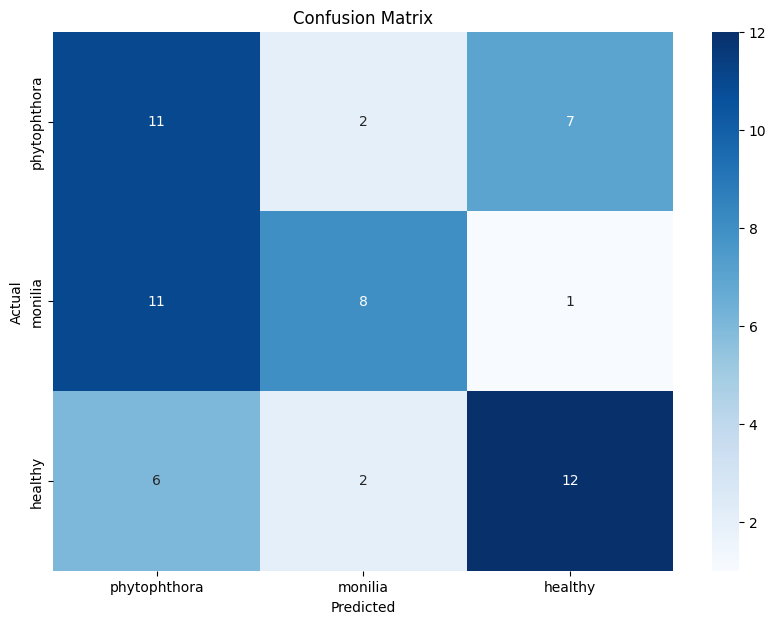

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()